# Classificação Multiclasse de Vinhos 🍷

Este notebook implementa uma rede neural artificial do zero para classificar a qualidade de vinhos (tinto e branco) com base em atributos fisico-químicos. O modelo é treinado usando apenas NumPy e permite customizar a arquitetura da rede e função de ativação.

In [1]:
!pip install numpy matplotlib pandas scikit-learn seaborn imblearn


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import sys
import os
import numpy as np


# Adiciona o caminho para importar módulos
sys.path.append(os.path.abspath("../src"))

from classification_multiclass.data_loader import WineQualityDataLoader
from classification_multiclass.wine_classifier import WineQualityClassifier

print("✅ Módulos carregados com sucesso.")

✅ Módulos carregados com sucesso.


In [3]:
loader = WineQualityDataLoader()
X_train, X_test, y_train, y_test, y_all = loader.load_and_prepare_data()
print("✅ Dados carregados.")
print(f"📐 Formato dos dados de treino: {X_train.shape}")
print(f"📐 Formato dos dados de teste: {X_test.shape}")

✅ Dados carregados e preparados com sucesso.
🔢 Total de amostras: 6497 | Treino: 4547 | Teste: 1950
✅ Dados carregados.
📐 Formato dos dados de treino: (4547, 11)
📐 Formato dos dados de teste: (1950, 11)


In [4]:
# Defina a arquitetura da rede neural

# 🔍 Verificando o número de classes nos dados de treino
num_classes = len(np.unique(y_train))
print("Número de classes detectado:", num_classes)

# 🔧 Definindo a arquitetura da rede
input_dim = X_train.shape[1]
architecture = [input_dim, 32, 16, num_classes]  # <- importante definir corretamente aqui

# 📌 Parâmetros configuráveis do modelo
activation_function = 'sigmoid'  # ou 'tanh', 'sigmoid'

# 🧠 Inicialização
model = WineQualityClassifier(architecture=architecture, activation=activation_function)
print("🧠 Modelo inicializado com ativação:", activation_function)

Número de classes detectado: 7
🧠 Modelo inicializado com ativação: sigmoid


In [5]:
print("🧪 Iniciando treinamento...")
losses = model.train(X_train, y_train, epochs=1000, learning_rate=0.01)
print("✅ Treinamento concluído.")

🧪 Iniciando treinamento...
Época 0 - Perda: 1.9389
Época 100 - Perda: 1.4713
Época 200 - Perda: 1.3634
Época 300 - Perda: 1.3264
Época 400 - Perda: 1.3094
Época 500 - Perda: 1.3001
Época 600 - Perda: 1.2946
Época 700 - Perda: 1.2910
Época 800 - Perda: 1.2884
Época 900 - Perda: 1.2865
✅ Treinamento concluído.


In [6]:
print("📊 Avaliando modelo...")
results = model.evaluate(X_test, y_test)

print(f"✅ Acurácia: {results['accuracy']:.4f}")
print("📘 Métricas por classe:")
for cls, metrics in results['metrics_per_class'].items():
    print(f"Classe {cls}: {metrics}")

📊 Avaliando modelo...
✅ Acurácia: 0.4364
📘 Métricas por classe:
Classe 0: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 9}
Classe 1: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 65}
Classe 2: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 642}
Classe 3: {'precision': np.float64(0.4364), 'recall': np.float64(1.0), 'f1-score': np.float64(0.6076), 'support': 851}
Classe 4: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 324}
Classe 5: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 58}
Classe 6: {'precision': 0.0, 'recall': np.float64(0.0), 'f1-score': 0.0, 'support': 1}


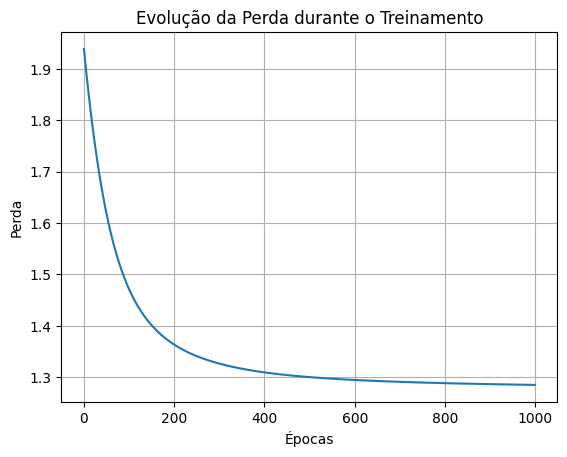

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.title("Evolução da Perda durante o Treinamento")
plt.grid(True)
plt.show()

In [8]:
results = model.evaluate(X_test, y_test)

print(f"✅ Acurácia: {results['accuracy']:.4f}")

✅ Acurácia: 0.4364
